In [251]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import nengo
%load_ext nengo.ipynb
import ipywidgets as widgets
import matplotlib.animation as animation

The nengo.ipynb extension is already loaded. To reload it, use:
  %reload_ext nengo.ipynb


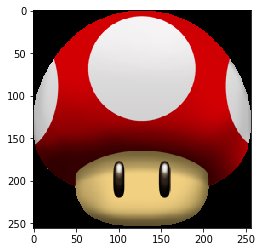

In [444]:
caminhos=['/Users/wachs/Dropbox/Photos/Boston City Flow.jpg','/Users/wachs/Downloads/icone.png']
img = cv2.imread(caminhos[1]);
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
w = 10
h = w
canais = 3
img=cv2.resize(img, (h,w),interpolation=cv2.INTER_CUBIC)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

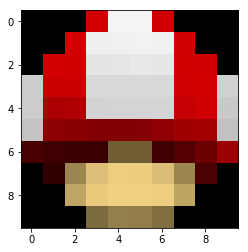

In [445]:
plt.imshow(img,cmap='gray')
img=img.astype('float')

# Criando a entrada cada pixel é um sinal de entrada

In [452]:
def ImgInput(img):
    return nengo.Node(size_out=h*w*canais, output=img.flatten().tolist())
    #return [[ nengo.Node(output=img[i,j]) for j in range(img.shape[1]) ] for i in range(img.shape[0])]

In [484]:
with nengo.Network('model') as modelSimples:
    r = ImgInput(img)
    n = nengo.Ensemble(dimensions=h*w*canais,n_neurons=1500,radius=255)
    nengo.Connection(r,n,synapse=0.01)
    nengo.Probe(n)

entradasComplexo=[]
saidasComplexo=[]
with nengo.Network('modelComplexo') as modelComplexo:
    r = ImgInput(img)
    saida = nengo.Ensemble(dimensions=h*w*canais,n_neurons=200, radius=255)
    for numPixel,i in enumerate(img.flatten()):
        si = nengo.Node(output=[i])
        k = nengo.Ensemble(dimensions=1,n_neurons=100,radius=255)
        nengo.Connection(si,k,synapse=0.01)
        nengo.Connection(k,saida[numPixel],synapse=0.01)        
        saidasComplexo.append(nengo.Probe(k))
        entradasComplexo.append(nengo.Probe(si))

    nengo.Connection(r,saida,synapse=0.01)        
    nengo.Probe(saida,synapse=0.01)
    

# Testando modelo simples

In [454]:
with nengo.Simulator(modelSimples, dt=0.01) as simSimples:
    simSimples.run(10)
saida = simSimples.data[modelSimples.probes[0]]
saida=saida.reshape([1000,h,w,canais]);

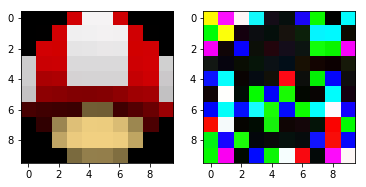

In [458]:
def comparacao(tempo):
    plt.close()
    plt.subplot(1,2,1)
    plt.imshow(img.astype('uint8'),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(saida[tempo,:,:,:].astype('uint8'))


comparacao(50)

# Testando modelo complexo

In [492]:
with nengo.Simulator(modelComplexo, dt=0.01) as simComplexo:
    simComplexo.run(1)


In [499]:
%magic

In [500]:
entrada=np.array([simComplexo.data[i] for i in entradasComplexo])
saida=np.array([simComplexo.data[i] for i in saidasComplexo])
saida=saida.reshape(h,w,canais, len(simComplexo.trange()))

saidaUltima = simComplexo.data[modelComplexo.probes[-1]]
saidaUltima = saidaUltima.reshape(h,w,canais,len(simComplexo.trange()))

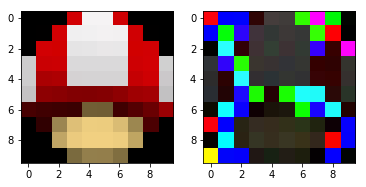

In [501]:
def comparacaoComplexo(tempo):
    plt.close()
    plt.subplot(1,2,1)
    plt.imshow(img.astype('uint8'),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(saida[:,:,:,tempo].astype('uint8'),cmap='gray')

    
comparacaoComplexo(1)

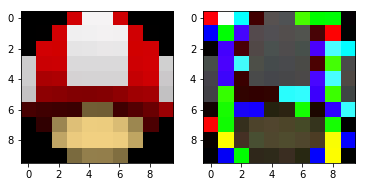

In [502]:
plt.close()
plt.subplot(1,2,1)
plt.imshow(img.astype('uint8'),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(saida[:,:,:,90].astype('uint8'),cmap='gray')